In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [11]:
import torch
from PIL import Image
from transformers import AutoImageProcessor, SegformerForSemanticSegmentation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
# Load model directly
processor = AutoImageProcessor.from_pretrained("unreal-hug/segformer-b5-seed42-outputs")
model = SegformerForSemanticSegmentation.from_pretrained("unreal-hug/segformer-b5-seed42-outputs")

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/339M [00:00<?, ?B/s]

In [26]:
# Specify the local file path
# image_path = "140_real.jpg"
# image_path = "144_real.jpg"
image_path = "256_real.jpg"
image = Image.open(image_path)

In [27]:
# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

In [28]:
# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

In [29]:
# Get the segmentation result
segmentation = outputs.logits.argmax(dim=1)
# Convert the segmentation result to a format suitable for visualization
segmentation = segmentation.squeeze().cpu().numpy()

In [30]:
# Retrieve the labels from the model output
# Assuming the model provides a 'labels' attribute or method that gives the label names
label_names = model.config.id2label  # Replace this with the actual method to get label names

# Define colors for each label
colors = plt.cm.get_cmap('tab20', len(label_names)).colors

# Create a colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(len(label_names) + 1) - 0.5, len(label_names))



/tmp/ipykernel_514052/2294105911.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(label_names)).colors


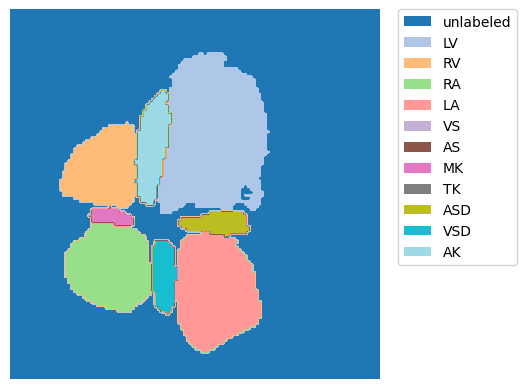

In [31]:
# Plot the segmentation result
plt.imshow(segmentation, cmap=cmap, norm=norm)
# Create a custom legend
from matplotlib.patches import Patch
handles = [Patch(facecolor=color, label=label) for label, color in zip(label_names.values(), colors)]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.axis('off')
plt.show()

/tmp/ipykernel_514052/1850512921.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(label_names)).colors


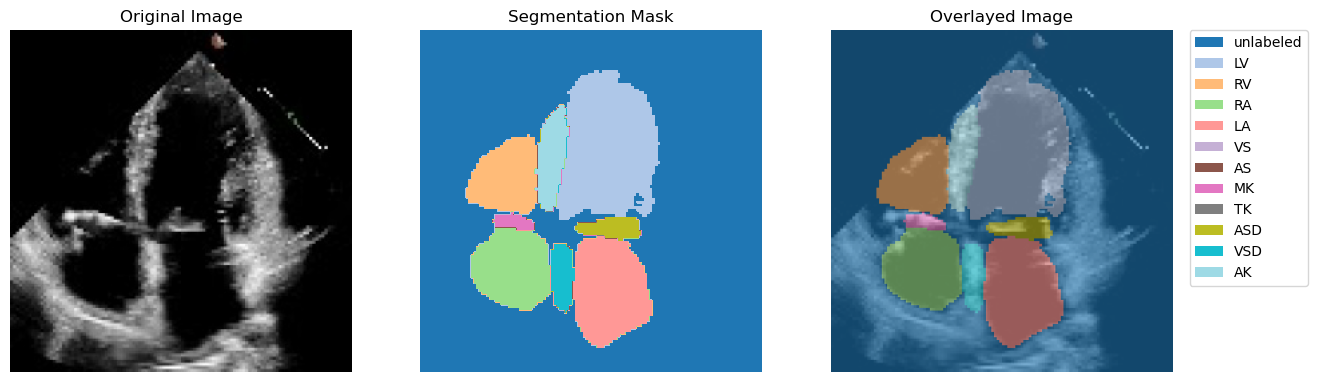

In [33]:
# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

# Get the segmentation result
segmentation = outputs.logits.argmax(dim=1).squeeze().cpu().numpy().astype(np.uint8)

# Resize the segmentation result to match the original image size
segmentation_resized = Image.fromarray(segmentation).resize(image.size, resample=Image.NEAREST)
segmentation_resized = np.array(segmentation_resized)

# Retrieve the labels from the model output
label_names = model.config.id2label  # Replace this with the actual method to get label names

# Define colors for each label
colors = plt.cm.get_cmap('tab20', len(label_names)).colors

# Create a color-coded segmentation mask
segmentation_color = np.zeros((segmentation_resized.shape[0], segmentation_resized.shape[1], 3), dtype=np.uint8)
for label_id, color in enumerate(colors):
    segmentation_color[segmentation_resized == label_id] = np.array(color[:3]) * 255

# Convert the original image to an array
image_array = np.array(image)

# Overlay the segmentation mask on the original image with transparency
alpha = 0.6  # Transparency factor
overlayed_image = image_array * (1 - alpha) + segmentation_color * alpha
overlayed_image = overlayed_image.astype(np.uint8)

# Plot the original image, segmentation mask, and overlayed image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmentation_resized, cmap=ListedColormap(colors), norm=BoundaryNorm(np.arange(len(label_names) + 1) - 0.5, len(label_names)))
ax[1].set_title('Segmentation Mask')
ax[1].axis('off')

ax[2].imshow(overlayed_image)
ax[2].set_title('Overlayed Image')
ax[2].axis('off')

# Create a custom legend
from matplotlib.patches import Patch
handles = [Patch(facecolor=color, label=label) for label, color in zip(label_names.values(), colors)]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()